# Understand the problem & dataset

#### 
This dataset encompasses a variety of diamonds characterized by distinct attributes like size and clarity. Additionally, it includes corresponding price information. Through exploration, various diamond types can be identified, and a model can be developed to predict prices for unseen diamonds as well. The following descriptions outline each column : 'carat' Diamond weight in carat, 'cut' diamond cutting quality, 'color' diamond color from J (worst) to D (best), 'clarity' A measure of diamond clarity (from left to right is worst to best: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF), 'x' diamond length in mm, 'y' diamond width in mm, 'z' diamond depth in mm, 'depth' Percentage depth that is equal to z / mean(x,y), 'table' The width of the widest point at the top of the diamond, 'price' (target) diamond price.

# Import Neccessary Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from sklearn.model_selection import GridSearchCV

# Load data 

In [3]:
diamond = pd.read_csv('diamonds.csv')

# Data Exploration 

In [4]:
# display the first five rows
pd.set_option('display.max_columns', None) # display all columns 
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [6]:
diamond.shape

(50000, 10)

In [7]:
# descriptive statistics 
diamond.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
# descriptive statistics for categorical features 
diamond.describe(include="object") 

,cut,color,clarity
count,50000,50000,50000
unique,5,7,8
top,Ideal,G,SI1
freq,19938,10452,12115


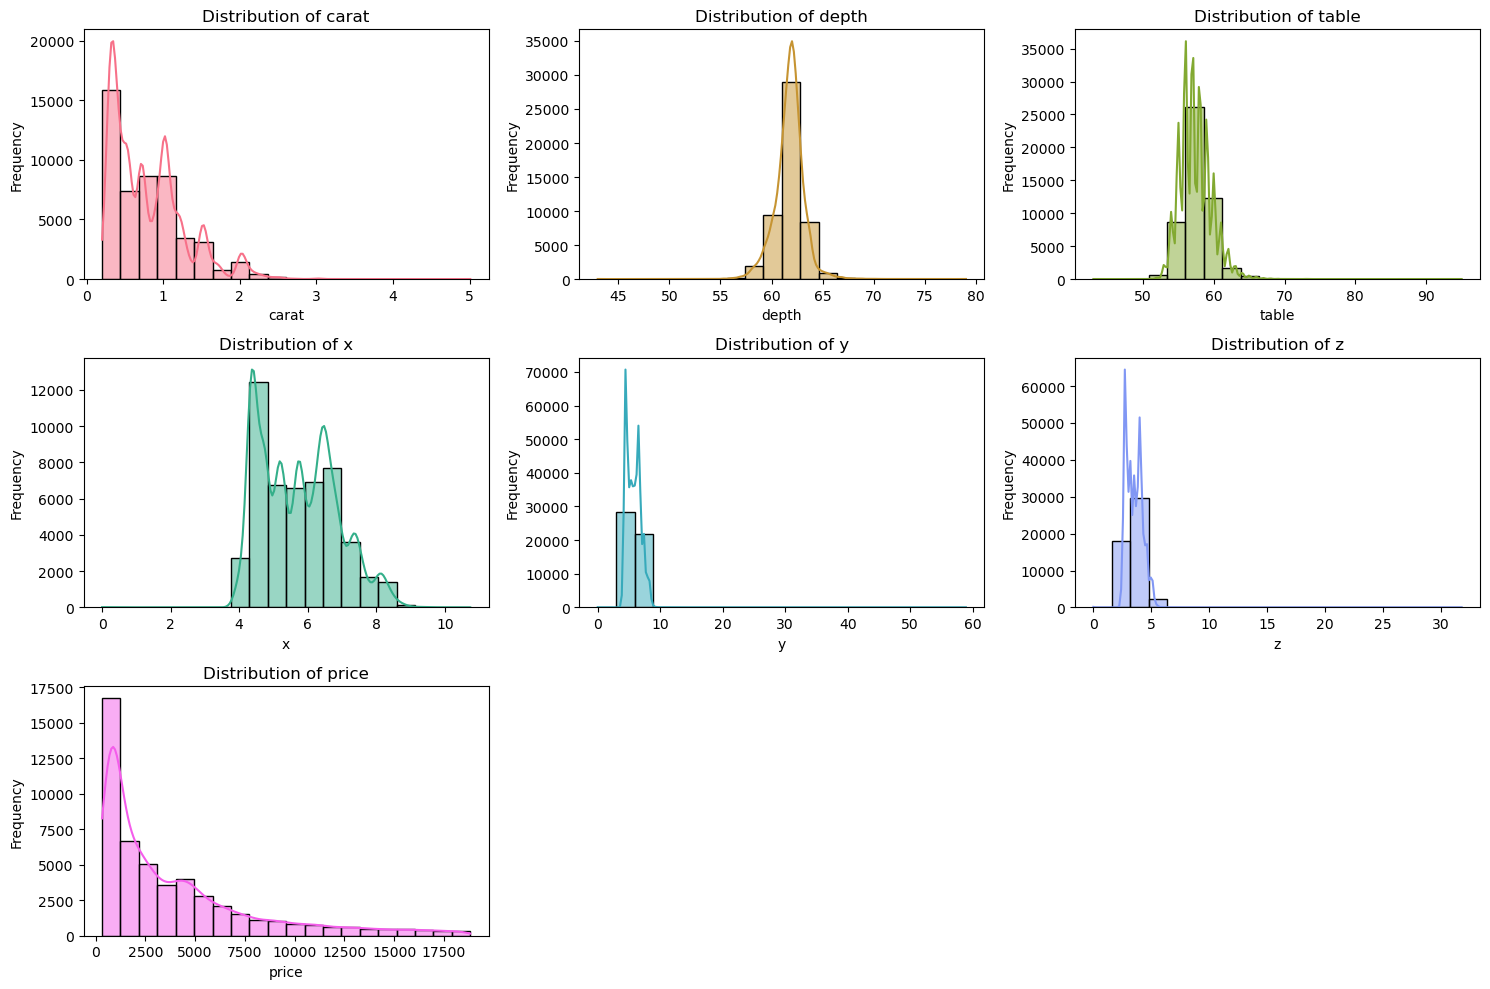

In [9]:
# Univariate analysis for numerical features with histograms and KDEs
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

# Define a color palette for better colors
colors = sns.color_palette('husl', n_colors=len(numerical_cols))

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(diamond[col], bins=20, kde=True, color=colors[i])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

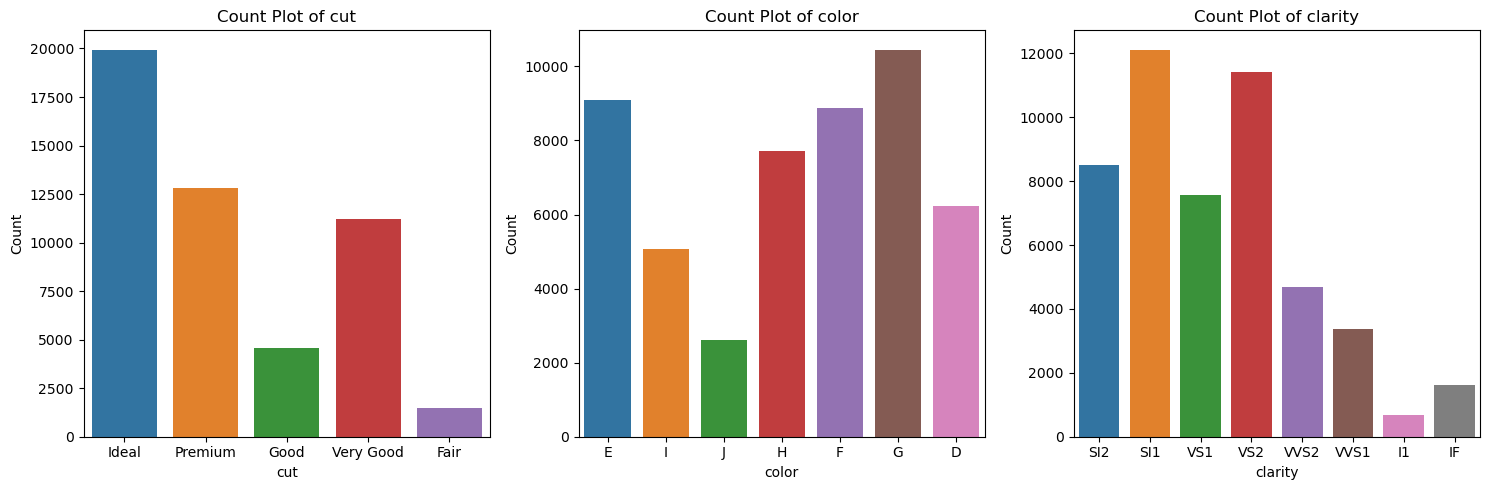

In [10]:
# Univariate analysis for categorical features 
categorical_cols = ['cut', 'color', 'clarity']

# Set up the grid layout
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_cols), figsize=(15, 5))

# Plot count plots for each categorical feature
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=diamond, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

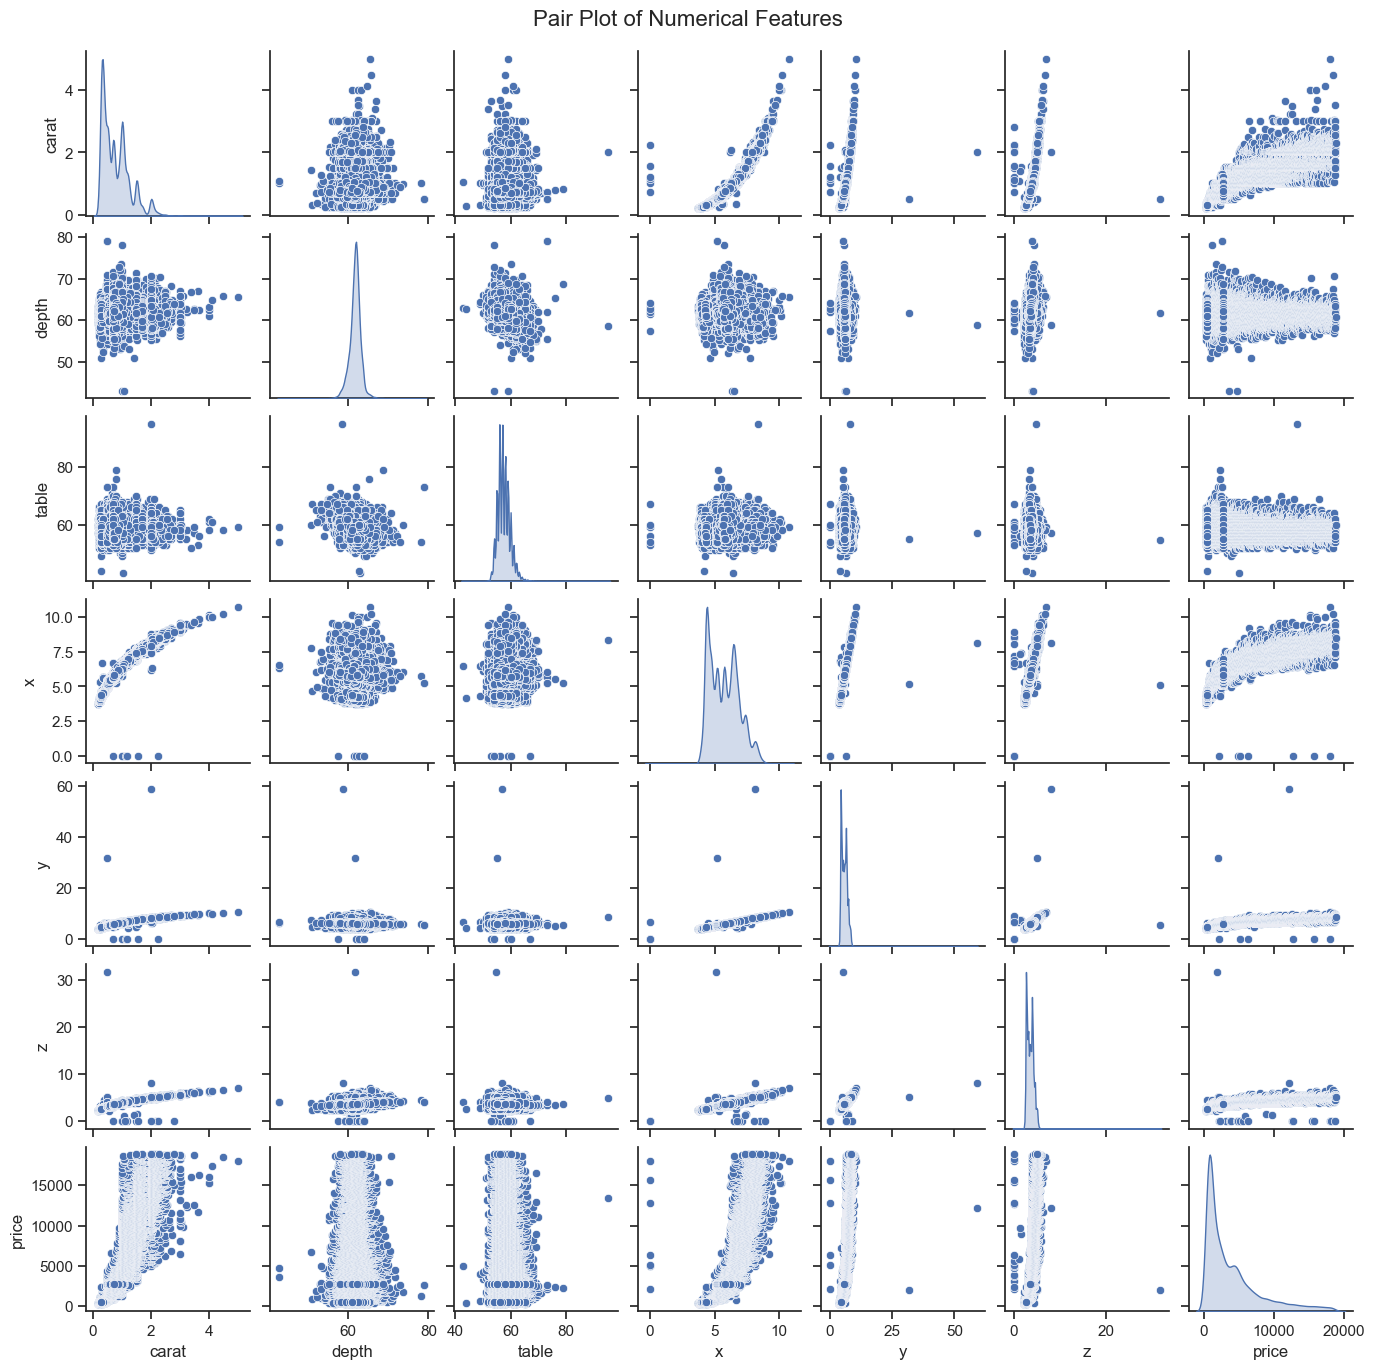

In [11]:
# Bivariate analysis for numerical features in a grid
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

# Create a pair plot with KDE on the diagonal
sns.set(style="ticks")
g = sns.pairplot(diamond[numerical_cols], diag_kind='kde', height=2)

# Adjust the layout
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Pair Plot of Numerical Features', fontsize=16)

plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_17968\3815695652.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diamond.corr()


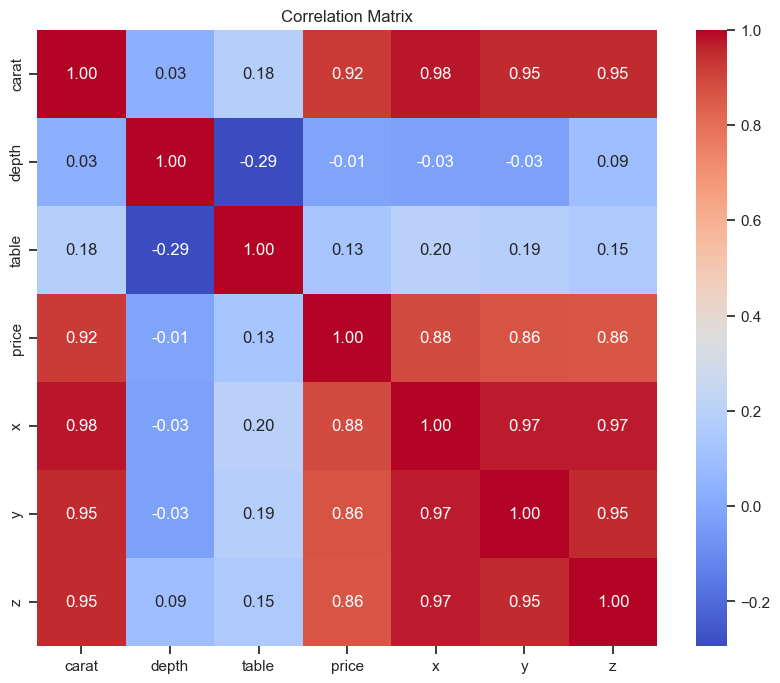

In [12]:
# Correlation matrix
correlation_matrix = diamond.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Columns with strong relationship with the target 'price'

In [13]:
# Calculate the correlation coefficients between numerical features and 'price'
correlations = diamond[numerical_cols].corr()['price'].abs()

# Set a threshold for considering a strong relationship
threshold = 0.5

# Filter columns with a correlation above the threshold
strong_relationships = correlations[correlations > threshold].index.tolist()

# Print columns with strong relationships and their correlation coefficients
for col in strong_relationships:
    print(f"{col}: {correlations[col]:.3f}")

carat: 0.922
x: 0.885
y: 0.864
z: 0.861
price: 1.000


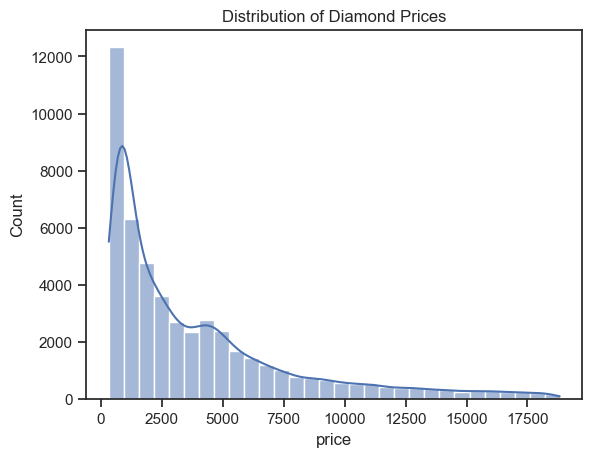

In [14]:
# Target variable distribution
sns.histplot(diamond['price'], bins=30, kde=True)
plt.title('Distribution of Diamond Prices')
plt.show()

In [15]:
# show descriptive statistics for 'price'
diamond['price'].describe()

count    50000.000000
mean      3944.805440
std       3997.938105
min        326.000000
25%        951.000000
50%       2410.000000
75%       5351.000000
max      18823.000000
Name: price, dtype: float64

# Data preprocessing

In [16]:
diamond1 = diamond

In [17]:
diamond1 = diamond1.rename(columns={
    'x': 'length',
    'y': 'width',
    'depth': 'depth_percentage',
    'z': 'depth'
})

In [18]:
diamond1.head()

,carat,cut,color,clarity,depth_percentage,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [128]:
# Check for duplicates  
diamond1.duplicated().sum()

0

In [19]:
# find the number of missing values for each column 
diamond1.isnull().sum()

carat               0
cut                 0
color               0
clarity             0
depth_percentage    0
table               0
price               0
length              0
width               0
depth               0
dtype: int64

### Encoding

In [20]:
ord_diamond = diamond1

In [21]:
# Ordinal Encoding
ordinal_columns = ['cut', 'color', 'clarity']
categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ['J', 'I', 'H', 'G', 'F', 'E', 'D'], ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
renamed_cols = ['Encoded' + column for column in ordinal_columns]

encoder = OrdinalEncoder(categories=categories)

ord_diamond[renamed_cols] = encoder.fit_transform(ord_diamond[ordinal_columns])
ord_diamond.head(10)

,carat,cut,color,clarity,depth_percentage,table,price,length,width,depth,Encodedcut,Encodedcolor,Encodedclarity
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4.0,5.0,1.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.0,5.0,2.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0,5.0,4.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3.0,1.0,3.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,1.0
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2.0,0.0,5.0
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,2.0,1.0,6.0
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,2.0,2.0,2.0
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,0.0,5.0,3.0
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,2.0,2.0,4.0


### Scaling

In [22]:
minmaxscaled = ord_diamond

In [23]:
minmaxscaled = minmaxscaled.drop(columns=['cut','color','clarity'])
minmaxscaled.head()

,carat,depth_percentage,table,price,length,width,depth,Encodedcut,Encodedcolor,Encodedclarity
0,0.23,61.5,55.0,326,3.95,3.98,2.43,4.0,5.0,1.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3.0,5.0,2.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,5.0,4.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3.0,1.0,3.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,1.0


In [24]:
minmaxscaled = minmaxscaled.drop(columns=['price'])
minmaxscaled.head()

,carat,depth_percentage,table,length,width,depth,Encodedcut,Encodedcolor,Encodedclarity
0,0.23,61.5,55.0,3.95,3.98,2.43,4.0,5.0,1.0
1,0.21,59.8,61.0,3.89,3.84,2.31,3.0,5.0,2.0
2,0.23,56.9,65.0,4.05,4.07,2.31,1.0,5.0,4.0
3,0.29,62.4,58.0,4.20,4.23,2.63,3.0,1.0,3.0
4,0.31,63.3,58.0,4.34,4.35,2.75,1.0,0.0,1.0


In [25]:
scaler = MinMaxScaler()
minmaxscaled = scaler.fit_transform(minmaxscaled)
# Concatenate the scaled features and target back together
minmaxscaled = pd.DataFrame(data=minmaxscaled, columns=['carat','depth_percentage','table','length','width','depth','Encodedcut','Encodedcolor','Encodedclarity'])
minmaxscaled['price'] = ord_diamond['price']
minmaxscaled.head()

,carat,depth_percentage,table,length,width,depth,Encodedcut,Encodedcolor,Encodedclarity,price
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,1.00,0.833333,0.142857,326
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,0.75,0.833333,0.285714,326
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,0.25,0.833333,0.571429,327
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704,0.75,0.166667,0.428571,334
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478,0.25,0.000000,0.142857,335


In [26]:
minmaxscaled['price'].shape

(50000,)

# Data Visualization 

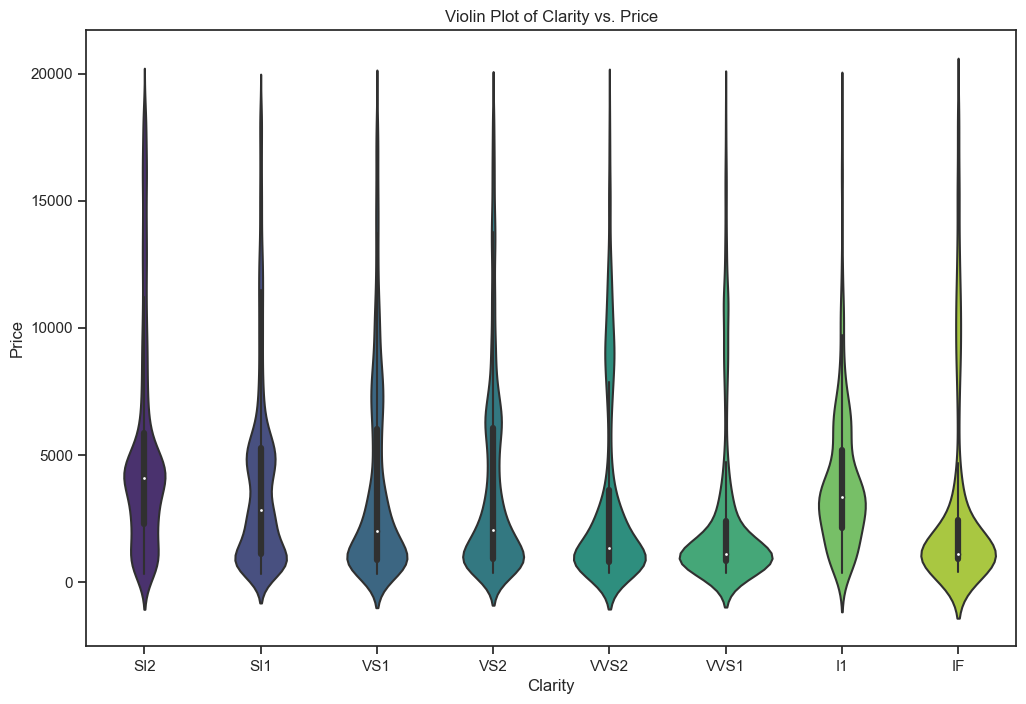

In [27]:
# Explore how clarity influences diamond prices
# Create the Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='clarity', y='price', data=diamond1, palette='viridis')

# Customize the plot
plt.title('Violin Plot of Clarity vs. Price')
plt.xlabel('Clarity')
plt.ylabel('Price')

# Show the plot
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_17968\2094562574.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='color', y='price', data=diamond1, estimator='mean', ci=None, palette='coolwarm')


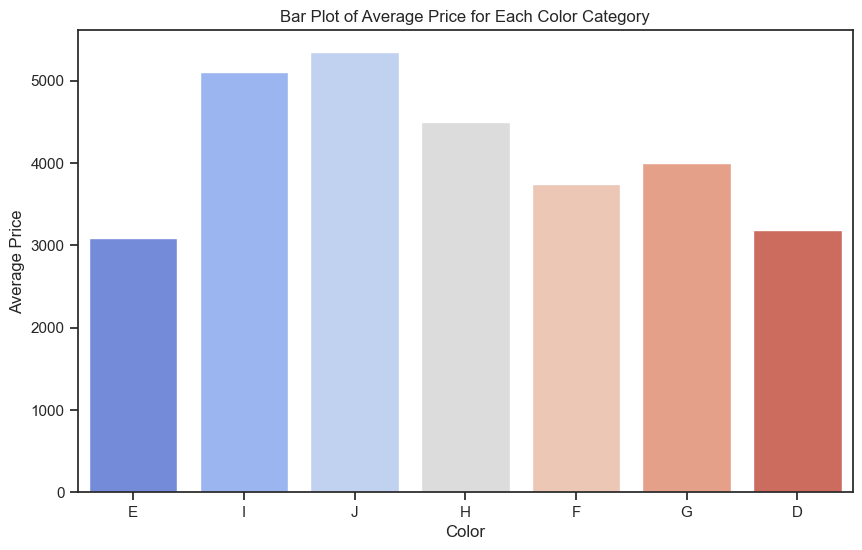

In [28]:
# Display the average price for different color categories.

# Create the Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='color', y='price', data=diamond1, estimator='mean', ci=None, palette='coolwarm')

# Customize the plot
plt.title('Bar Plot of Average Price for Each Color Category')
plt.xlabel('Color')
plt.ylabel('Average Price')

# Show the plot
plt.show()

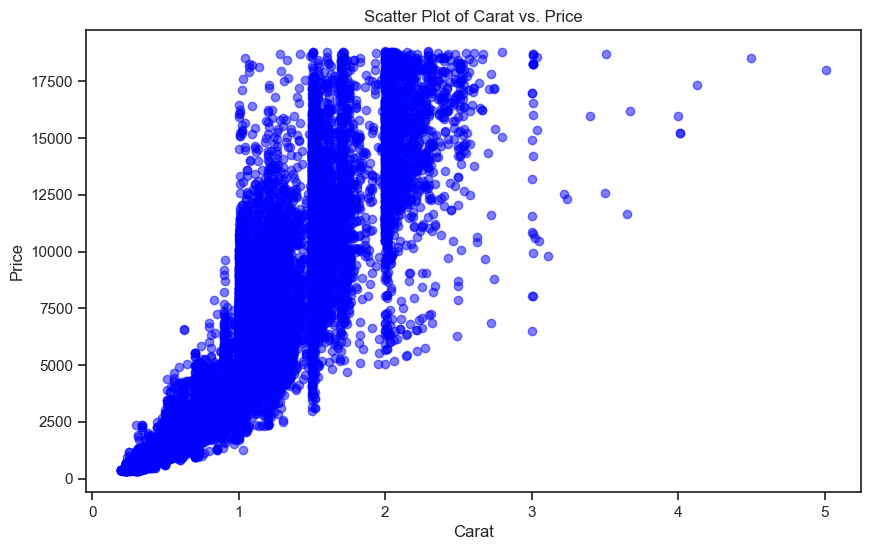

In [29]:
# Investigate how the carat size affects the diamond price
# Create the Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(diamond1['carat'], diamond1['price'], alpha=0.5, color='blue')

# Customize the plot
plt.title('Scatter Plot of Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')

# Show the plot
plt.show()

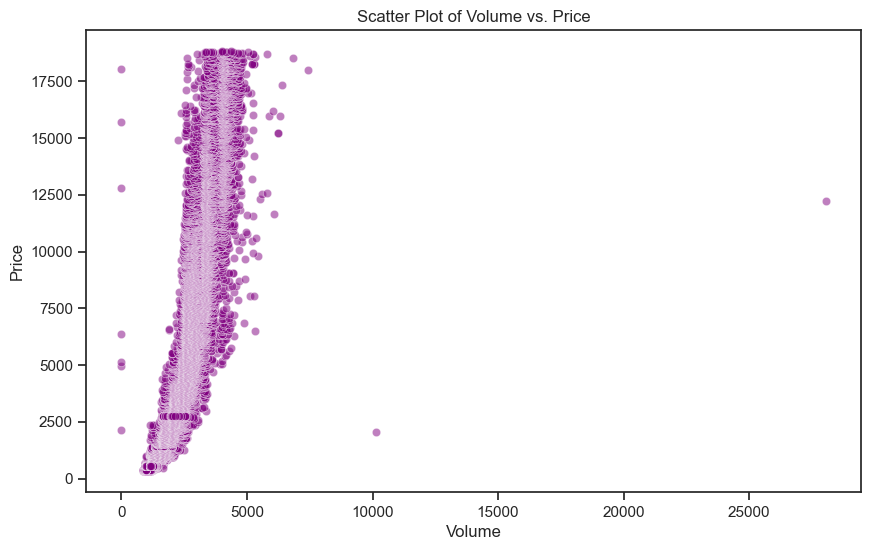

In [37]:
# Create the Scatter Plot with on-the-fly volume calculation to find the relationship between volume and price 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=diamond1['length'] * diamond1['width'] * diamond['depth'], y='price', data=diamond1, alpha=0.5, color='purple')

# Customize the plot
plt.title('Scatter Plot of Volume vs. Price')
plt.xlabel('Volume')
plt.ylabel('Price')

# Show the plot
plt.show()

# Models

### Random Forest 

In [38]:
X = minmaxscaled[['carat','depth_percentage','table','length','width','depth','Encodedcut','Encodedcolor','Encodedclarity']]
y = minmaxscaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Absolute Error: 262.9172100226191
Mean Squared Error: 277988.373105225
R-squared: 0.9820151329761434


In [52]:
# Create a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Print the best parameters
print(f'Best hyperparameters: {best_params_rf}')
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error: {mae_rf}')
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse_rf}')
r2_rf = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2_rf}')

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Mean Absolute Error: 261.7294210985874
Mean Squared Error: 274822.7638786879
R-squared: 0.9822199367251376


### Linear Regression 

In [40]:
# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f'Mean Absolute Error: {mae_linear}')

# Calculate Mean Squared Error
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error: {mse_linear}')

# Calculate R-squared
r2_linear = r2_score(y_test, y_pred_linear)
print(f'R-squared: {r2_linear}')

Mean Absolute Error: 786.324729052429
Mean Squared Error: 1407745.5865738979
R-squared: 0.9089238269387292


In [41]:
linear_model_op = LinearRegression()

# Define the hyperparameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],  # Whether to copy X before fitting
    'n_jobs': [None, -1],     # Number of CPU cores to use for computation
    'positive': [True, False], # Constrain the coefficients to be positive
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(linear_model_op, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_linear_model = grid_search.best_estimator_

# Train the best model on the entire training set
best_linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear_op = best_linear_model.predict(X_test)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

mae_linear_op = mean_absolute_error(y_test, y_pred_linear_op)
print(f'Mean Absolute Error: {mae_linear_op}')

mse_linear_op = mean_squared_error(y_test, y_pred_linear_op)
print(f'Mean Squared Error: {mse_linear_op}')

r2_linear_op = r2_score(y_test, y_pred_linear_op)
print(f'R-squared: {r2_linear_op}')

Best hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Mean Absolute Error: 786.324729052429
Mean Squared Error: 1407745.5865738979
R-squared: 0.9089238269387292


### Support Vector Machine ( SVR )

In [47]:
st_scaled = ord_diamond

In [48]:
st_scaled = st_scaled.drop(columns=['cut','color','clarity','price'])
st_scaler = StandardScaler()
st_scaled = st_scaler.fit_transform(st_scaled)
# Concatenate the scaled features and target back together
st_scaled= pd.DataFrame(data=st_scaled, columns=['carat','depth_percentage','table','length','width','depth','Encodedcut','Encodedcolor','Encodedclarity'])
st_scaled['price'] = ord_diamond['price']
st_scaled.head()

,carat,depth_percentage,table,length,width,depth,Encodedcut,Encodedcolor,Encodedclarity,price
0,-1.198405,-0.176795,-1.101144,-1.588868,-1.534572,-1.571380,0.982622,0.940237,-1.245926,326
1,-1.240495,-1.364714,1.586944,-1.642293,-1.656782,-1.741097,0.087131,0.940237,-0.637475,326
2,-1.198405,-3.391165,3.379003,-1.499826,-1.456009,-1.741097,-1.703850,0.940237,0.579429,327
3,-1.072134,0.452104,0.242900,-1.366263,-1.316340,-1.288517,0.087131,-1.412150,-0.029023,334
4,-1.030043,1.081003,0.242900,-1.241604,-1.211588,-1.118800,-1.703850,-2.000246,-1.245926,335


In [49]:
x_svr = st_scaled[['carat','depth_percentage','table','length','width','depth','Encodedcut','Encodedcolor','Encodedclarity']]
y_svr = st_scaled['price']

X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(x_svr, y_svr, test_size=0.2, random_state=42)

# Create a Support Vector Regression model
svr_model = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', etc.

# Train the model
svr_model.fit(X_train_svr, y_train_svr)

# Make predictions on the scaled test set
y_pred_svr = svr_model.predict(X_test_svr)

mae_svr = mean_absolute_error(y_test_svr, y_pred_svr)
print(f'Mean Absolute Error: {mae_svr}')

# Calculate Mean Squared Error
mse_svr = mean_squared_error(y_test_svr, y_pred_svr)
print(f'Mean Squared Error: {mse_svr}')

# Calculate R-squared
r2_svr = r2_score(y_test_svr, y_pred_svr)
print(f'R-squared: {r2_svr}')

Mean Absolute Error: 805.9186134690295
Mean Squared Error: 2046166.4412013497
R-squared: 0.8676202499312641


In [50]:
# Define the parameter grid for SVR
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2, 0.5],  # Epsilon in the epsilon-SVR model
}

# Create a Support Vector Regression model
svr_model_op = SVR(kernel='linear')

# Create GridSearchCV object
grid_search = GridSearchCV(svr_model_op, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_svr, y_train_svr)

# Get the best parameters from the grid search
best_params_svr = grid_search.best_params_
print(f'Best Parameters: {best_params_svr}')

# Train the model with the best parameters
best_svr_model = grid_search.best_estimator_
best_svr_model.fit(X_train_svr, y_train_svr)

# Make predictions on the scaled test set
y_pred_svr_op = best_svr_model.predict(X_test_svr)

mae_svr_op = mean_absolute_error(y_test_svr, y_pred_svr_op)
print(f'Mean Absolute Error: {mae_svr_op}')

mse_svr_op = mean_squared_error(y_test_svr, y_pred_svr_op)
print(f'Mean Squared Error: {mse_svr_op}')

r2_svr_op = r2_score(y_test_svr, y_pred_svr_op)
print(f'R-squared: {r2_svr_op}')


Best Parameters: {'C': 10, 'epsilon': 0.5}
Mean Absolute Error: 695.5741250201488
Mean Squared Error: 1813045.893236627
R-squared: 0.8827023269578709


### Decision Tree

In [42]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f'Mean Absolute Error: {mae_dt}')
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Mean Squared Error: {mse_dt}')
r2_dt = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2_dt}')

Mean Absolute Error: 358.9291
Mean Squared Error: 565464.84985
R-squared: 0.9634164191199184


In [44]:
# Create a Decision Tree Regressor
dt_model_op = DecisionTreeRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Perform GridSearchCV
grid_search_dt = GridSearchCV(dt_model_op, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)

# Get the best model
best_dt_model = grid_search_dt.best_estimator_

# Make predictions on the test set
y_pred_dt_op = best_dt_model.predict(X_test)


print("Best hyperparameters:", grid_search_dt.best_params_)

mae_dt_op = mean_absolute_error(y_test, y_pred_dt_op)
print(f'Mean Absolute Error: {mae_dt_op}')
mse_dt_op = mean_squared_error(y_test, y_pred_dt_op)
print(f'Mean Squared Error (Decision Tree): {mse_dt_op}')
r2_dt_op = r2_score(y_test, y_pred_dt_op)
print(f'R-squared: {r2_dt_op}')

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Absolute Error: 329.12129078839365
Mean Squared Error (Decision Tree): 380646.11183141917
R-squared: 0.9753735394471164


### K-NN

In [45]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f'Mean Absolute Error: {mae_knn}')
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f'Mean Squared Error: {mse_knn}')
r2_knn = r2_score(y_test, y_pred_knn)
print(f'R-squared: {r2_knn}')

Mean Absolute Error: 367.05377999999996
Mean Squared Error: 531957.1047799999
R-squared: 0.9655842520138687


In [46]:
knn_model_op = KNeighborsRegressor()

# Define the hyperparameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(knn_model_op, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_knn = grid_search.best_params_
print(f"Best Hyperparameters: {best_params_knn}")

# Train the model with the best hyperparameters
best_knn_model = grid_search.best_estimator_
best_knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn_op = best_knn_model.predict(X_test)

mae_knn_op = mean_absolute_error(y_test, y_pred_knn_op)
print(f'Mean Absolute Error: {mae_knn_op}')

mse_knn_op = mean_squared_error(y_test, y_pred_knn_op)
print(f'Mean Squared Error: {mse_knn_op}')

r2_knn_op = r2_score(y_test, y_pred_knn_op)
print(f'R-squared: {r2_knn_op}')

Best Hyperparameters: {'n_neighbors': 5}
Mean Absolute Error: 367.05377999999996
Mean Squared Error: 531957.1047799999
R-squared: 0.9655842520138687


### Multi-layer Perceptron (MLP)

In [162]:
print(X_train_svr.shape)
print(X_test_svr.shape)
print(y_train_svr.shape)
print(y_test_svr.shape)

(40000, 9)
(10000, 9)
(40000,)
(10000,)


In [163]:
# Build NN
tf.random.set_seed(42)
model = tf.keras.Sequential()
#Specify input shape
model.add(tf.keras.layers.Dense(100,'relu',input_shape=(9,)))
model.add(tf.keras.layers.Dense(10,'relu'))
model.add(tf.keras.layers.Dense(1,None))
#2.Compile the model use mean absolute layer as loss function as it tends to perform well on regression models
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics="mae")
#3.Train model and save historical data
history = model.fit(tf.expand_dims(X_train_svr, axis=-1),y_train_svr,epochs=20)

Epoch 1/20
1250/1250 [==============================] - 6s 4ms/step - loss: 1032.7678 - mae: 1032.7678
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 480.0382 - mae: 480.0382
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 441.3351 - mae: 441.3351
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 432.2997 - mae: 432.2997
Epoch 5/20
1250/1250 [==============================] - 4s 4ms/step - loss: 428.2839 - mae: 428.2839
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 410.6204 - mae: 410.6204
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 392.2501 - mae: 392.2501
Epoch 8/20
1250/1250 [==============================] - 4s 3ms/step - loss: 384.3977 - mae: 384.3977
Epoch 9/20
1250/1250 [==============================] - 4s 3ms/step - loss: 379.9648 - mae: 379.9648
Epoch 10/20
1250/1250 [==============================] - 4s 3ms/step - loss: 377.0937 - m

In [164]:
predictions = model.predict(X_test_svr)

# Calculate various evaluation metrics
mae_nn = mean_absolute_error(y_test_svr, predictions)
mse_nn = mean_squared_error(y_test_svr, predictions)
r2_nn = r2_score(y_test_svr, predictions)

# Print the evaluation metrics
print("Mean Absolute Error:", mae_nn)
print("Mean Squared Error:", mse_nn)
print("R^2 Score:", r2_nn)

313/313 [==============================] - 1s 3ms/step
Mean Absolute Error: 359.81959402160646
Mean Squared Error: 3993054.6083690245
R^2 Score: 0.7416634539483733


In [181]:
!pip install keras-tuner

     ------------------------------------ 128.9/128.9 kB 760.7 kB/s eta 0:00:00


In [184]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from kerastuner.tuners import RandomSearch
import numpy as np

# Convert your data to numpy arrays if it's in DataFrame format
X_train_svr = X_train_svr.values
y_train_svr = y_train_svr.values

# Define the model-building function
def build_model(hp):
    model = keras.Sequential()

    # Choose the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(layers.Dense(units=hp_units, activation='relu', input_shape=(9,)))

    # Add more Dense layers (you can experiment with different architectures)
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(layers.Dense(units=hp_units, activation='relu'))

    # Add the output layer
    model.add(layers.Dense(1, None))

    # Compile the model
    model.compile(
        loss=keras.losses.mean_absolute_error,
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        metrics=['mae'])

    return model

# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over folds
for train_index, val_index in kf.split(X_train_svr):
    X_train_fold, X_val_fold = X_train_svr[train_index], X_train_svr[val_index]
    y_train_fold, y_val_fold = y_train_svr[train_index], y_train_svr[val_index]

    # Instantiate the tuner and perform random search for each fold
    tuner = RandomSearch(
        build_model,
        objective='val_mae',
        max_trials=5,  # Adjust as needed
        executions_per_trial=3,
        directory='hyperparameter_tuning',
        project_name='your_project_name')

    # Perform the hyperparameter search for the current fold
    tuner.search(tf.expand_dims(X_train_fold, axis=-1), y_train_fold,
                 epochs=20,
                 validation_data=(tf.expand_dims(X_val_fold, axis=-1), y_val_fold))

    # Get the best hyperparameters for the current fold
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Build the model with the best hyperparameters
    model = tuner.hypermodel.build(best_hps)

    # Train the model on the current fold
    history = model.fit(tf.expand_dims(X_train_fold, axis=-1), y_train_fold,
                        epochs=20,
                        validation_data=(tf.expand_dims(X_val_fold, axis=-1), y_val_fold))

    # Evaluate the model on the test set for the current fold
    predictions = model.predict(X_test_svr)
    mae_nn = mean_absolute_error(y_test_svr, predictions)
    mse_nn = mean_squared_error(y_test_svr, predictions)
    r2_nn = r2_score(y_test_svr, predictions)

    # Print the evaluation metrics for the current fold
    print(f"Fold - Mean Absolute Error: {mae_nn}, Mean Squared Error: {mse_nn}, R^2 Score: {r2_nn}")


Trial 5 Complete [00h 05m 32s]
val_mae: 304.42095947265625

Best val_mae So Far: 304.42095947265625
Total elapsed time: 00h 27m 39s
Epoch 1/20
1000/1000 [==============================] - 8s 6ms/step - loss: 687.2079 - mae: 687.2079 - val_loss: 388.4998 - val_mae: 388.4998
Epoch 2/20
1000/1000 [==============================] - 5s 5ms/step - loss: 380.6638 - mae: 380.6638 - val_loss: 366.3445 - val_mae: 366.3445
Epoch 3/20
1000/1000 [==============================] - 5s 5ms/step - loss: 360.3641 - mae: 360.3641 - val_loss: 357.1284 - val_mae: 357.1284
Epoch 4/20
1000/1000 [==============================] - 5s 5ms/step - loss: 359.9838 - mae: 359.9838 - val_loss: 354.8500 - val_mae: 354.8500
Epoch 5/20
1000/1000 [==============================] - 5s 5ms/step - loss: 347.0983 - mae: 347.0983 - val_loss: 358.2786 - val_mae: 358.2786
Epoch 6/20
1000/1000 [==============================] - 5s 5ms/step - loss: 344.9840 - mae: 344.9840 - val_loss: 351.7152 - val_mae: 351.7152
Epoch 7/20
1000/